In [1]:
# NOTES: CHANGE THRESHOLD FOR REVIEWS TO BE BASED ON PROPORTION INSTEAD
import numpy as np
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


vermont_ratings_only = pd.read_csv("data/rating-Vermont.csv.gz")


def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

vermont_reviews = pd.DataFrame(parse("data/review-Vermont_10.json.gz"))
vermont_meta = pd.DataFrame(parse("data/meta-Vermont.json.gz"))


In [2]:
#vermont_ratings_only

In [3]:
#vermont_reviews

In [ ]:
#VERMONT_BIG_BRANDS_ALL GIVES ALL THE BRANDS IN VERMONT THAT HAVE 500+ REVIEWS (TOTAL)

vermont_merged_reviews = vermont_meta.merge(vermont_reviews, on='gmap_id')
#TOTAL REVIEWS
vermont_merged_reviews_count = vermont_merged_reviews.groupby(by='name_x').count()
#vermont_merged_reviews_count
def divide_by_total_reviews(review_count):
    total_reviews = vermont_reviews.shape[0]
    return review_count / total_reviews
vermont_proportions = vermont_merged_reviews_count.get('address').apply(divide_by_total_reviews)
vermont_merged_reviews_count = vermont_merged_reviews_count.assign(proportions = vermont_proportions)
vermont_merged_reviews_count
vermont_big_brands_all = vermont_merged_reviews_count[vermont_merged_reviews_count.get('proportions') >= 0.001].sort_values(by='proportions', ascending=False)
vermont_big_brands_all # BIG BRANDS BY PROPORTION OF REVIEWS (VERMONT)

,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,...,relative_results,url,user_id,name_y,time,rating,text,pics,resp,proportions
name_x,,,,,,,,,,,,,,,,,,,,,
McDonald's,7714,7714,7714,7714,7714,7714,7714,7714,7714,7651,...,7714,7714,7714,7714,7714,7714,3724,70,0,0.023755
Dunkin',4508,4508,4508,4508,4508,4508,4508,4508,4508,4508,...,4488,4508,4508,4508,4508,4508,2154,36,0,0.013883
Hannaford Supermarket,4411,4411,0,4411,4411,4411,4411,4411,4319,4411,...,4319,4411,4411,4411,4411,4411,1933,20,0,0.013584
Dollar General,3662,3662,3662,3662,3662,3662,3662,3662,3615,3662,...,3615,3662,3662,3662,3662,3662,1833,11,0,0.011277
Shaw's,3152,3152,3152,3152,3152,3152,3152,3152,3152,3152,...,3152,3152,3152,3152,3152,3152,1500,23,18,0.009707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guilford Welcome Center,331,331,0,331,331,331,331,331,0,331,...,331,331,331,331,331,331,204,12,2,0.001019
AT&T Store,330,330,330,330,330,330,330,330,195,330,...,330,330,330,330,330,330,177,0,74,0.001016
Okemo Mountain Resort,328,328,328,328,328,328,328,328,0,0,...,328,328,328,328,328,328,169,31,0,0.001010


In [5]:
def parse_first_n(path, n=1000000):
    g = gzip.open('data/' + path, 'r')
    for i, l in enumerate(g):
        if i >= n:
            break
        yield json.loads(l)

washington_ratings_only = pd.read_csv("data/rating-Washington.csv.gz")

washington_reviews = pd.DataFrame(parse_first_n("review-Washington_10.json.gz"))
washington_meta = pd.DataFrame(parse_first_n("meta-Washington.json.gz"))

In [ ]:
#WASHINGTON_BIG_BRANDS_ALL GIVES ALL THE BRANDS IN WASHINGTON THAT HAVE 500+ REVIEWS (TOTAL)

washington_merged_reviews = washington_meta.merge(washington_reviews, on='gmap_id')
#TOTAL REVIEWS
washington_merged_reviews_count = washington_merged_reviews.groupby(by='name_x').count()
#washington_merged_reviews_count
def divide_by_total_reviews_w(review_count):
    total_reviews = washington_reviews.shape[0]
    return review_count / total_reviews
washington_proportions = washington_merged_reviews_count.get('address').apply(divide_by_total_reviews_w)
washington_merged_reviews_count = washington_merged_reviews_count.assign(proportions = washington_proportions)
washington_merged_reviews_count
washington_big_brands_all = washington_merged_reviews_count[washington_merged_reviews_count.get('proportions') >= 0.001].sort_values(by='proportions', ascending=False)
washington_big_brands_all # WASHINGTON BIG BRANDS BY PROPORTION OF REVIEWS

,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,...,relative_results,url,user_id,name_y,time,rating,text,pics,resp,proportions
name_x,,,,,,,,,,,,,,,,,,,,,
McDonald's,12581,12581,12581,12581,12581,12581,12581,12581,12581,12397,...,12581,12581,12581,12581,12581,12581,6289,136,0,0.012581
Costco Wholesale,11383,11383,11368,11383,11383,11383,11383,11383,11383,11368,...,11383,11383,11383,11383,11383,11383,4525,112,0,0.011383
Walmart Supercenter,10668,10668,0,10668,10668,10668,10668,10668,10668,10668,...,10668,10668,10668,10668,10668,10668,5448,89,0,0.010668
Starbucks,7775,7775,7763,7775,7775,7775,7775,7775,7714,6994,...,7466,7775,7775,7775,7775,7775,3742,143,1,0.007775
Dick's Drive-In,6306,6306,6306,6306,6306,6306,6306,6306,6306,6306,...,6306,6306,6306,6306,6306,6306,3252,95,22,0.006306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wild Ginger,1043,1043,1043,1043,1043,1043,1043,1043,1043,1043,...,1043,1043,1043,1043,1043,1043,569,47,13,0.001043
Moby Dick,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,...,1021,1021,1021,1021,1021,1021,738,32,51,0.001021
Applebee's Grill + Bar,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018,...,1018,1018,1018,1018,1018,1018,572,15,7,0.001018


In [7]:
# BIG BRANDS THAT APPEAR IN BOTH WASHINGTON AND VERMONT
big_brands_all_both = washington_big_brands_all.merge(vermont_big_brands_all, on='name_x')
big_brands_all_both

,address_x,gmap_id_x,description_x,latitude_x,longitude_x,category_x,avg_rating_x,num_of_reviews_x,price_x,hours_x,...,relative_results_y,url_y,user_id_y,name_y_y,time_y,rating_y,text_y,pics_y,resp_y,proportions_y
name_x,,,,,,,,,,,,,,,,,,,,,
McDonald's,12581,12581,12581,12581,12581,12581,12581,12581,12581,12397,...,7714,7714,7714,7714,7714,7714,3724,70,0,0.023755
Walmart Supercenter,10668,10668,0,10668,10668,10668,10668,10668,10668,10668,...,1497,1497,1497,1497,1497,1497,736,14,0,0.004610
Starbucks,7775,7775,7763,7775,7775,7775,7775,7775,7714,6994,...,1036,1155,1155,1155,1155,1155,550,16,0,0.003557
Subway,5064,5064,5064,5064,5064,5064,5064,5064,5064,5015,...,1710,1710,1710,1710,1710,1710,841,14,0,0.005266
The Home Depot,4592,4592,4592,4592,4592,4592,4592,4592,4592,4592,...,918,918,918,918,918,918,440,11,1,0.002827
Lowe's Home Improvement,4491,4491,4491,4491,4491,4491,4491,4491,4428,4491,...,994,994,994,994,994,994,470,8,0,0.003061
Taco Bell,2775,2775,2775,2775,2775,2775,2775,2775,2775,2775,...,1055,1055,1055,1055,1055,1055,594,10,369,0.003249
IHOP,2572,2572,2572,2572,2572,2572,2572,2572,2572,2572,...,431,431,431,431,431,431,217,7,0,0.001327
Best Buy,2459,2459,2459,2459,2459,2459,2459,2459,2459,2459,...,882,882,882,882,882,882,442,5,13,0.002716


In [8]:
# Sorted dataset of brands by how many locations exist in Vermont
vermont_locations = vermont_meta.groupby('name').count().sort_values(by='address', ascending=False)

#CLASSIFIES THE TYPE OF BRAND BASED ON NUMBER OF LOCATIONS
def location_classification(num_locations):
    if num_locations == 1:
        return 'singular'
    elif num_locations < 20: #number not fixed, not sure if this is the best value for determining medium-large
        return 'small'
    else:
        return 'large'
    

vermont_locations = vermont_locations.assign(num_locations = vermont_locations.get('gmap_id'))
vermont_locations['brand_size'] = (vermont_locations['num_locations'].apply(location_classification))
vermont_locations_classification = vermont_locations.get(['brand_size'])
vermont_locations_classification
#vermont_locations

vermont_large_brands_list = vermont_locations_classification[vermont_locations_classification.get('brand_size') == 'large'].index
vermont_large_brands_list

vermont_large_brands_ids = vermont_meta[vermont_meta.get('name').isin(vermont_large_brands_list)].set_index('gmap_id').index
vermont_large_brands_ids

vermont_large_brand_reviews = vermont_reviews[vermont_reviews.get('gmap_id').isin(vermont_large_brands_ids)]
vermont_large_brand_reviews
#vermont_locations_classification
#vermont_large_brands_ids

,user_id,name,time,rating,text,pics,resp,gmap_id
288,108758476807946989876,mooney576,1618685555898,5,This is the nicest Dollar General I have ever ...,None,None,0x4cb557211ca274a7:0xea1066df24155f3f
289,107910713451324158864,Ramona Boswell,1618720230434,5,Found my spin mop for a very reasonable price ...,None,None,0x4cb557211ca274a7:0xea1066df24155f3f
290,104194948209630774333,Margaret Korda,1618089231515,5,"Children activity books, toys, almond milk, wo...",None,None,0x4cb557211ca274a7:0xea1066df24155f3f
291,115609550906928329447,Nickie Farone,1606002449608,5,My first time to this new Dollar General in Sh...,None,None,0x4cb557211ca274a7:0xea1066df24155f3f
292,116807005411196146915,Chris Morris,1614431327231,5,"This place is new, nicely stocked, great custo...",None,None,0x4cb557211ca274a7:0xea1066df24155f3f
...,...,...,...,...,...,...,...,...
324516,116570649391413859491,Tom McHugh,1563412244988,3,NaN,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0
324517,105953893850116663151,Richard JOLLY Tanner,1613699581040,4,NaN,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0
324518,117068151183390796410,Peter Sorrell,1497179653796,3,NaN,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0
324519,114163972183035788532,Kurt Anderson,1553271562926,4,NaN,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0


In [9]:
# Sorted dataset of brands by how many locations exist in Washington
washington_locations = washington_meta.groupby('name').count().sort_values(by='address', ascending=False)


washington_locations = washington_locations.assign(num_locations = washington_locations.get('gmap_id'))
washington_locations['brand_size'] = (washington_locations['num_locations'].apply(location_classification))
washington_locations_classification = washington_locations.get(['brand_size'])
washington_locations_classification
#washington_locations

washington_large_brands_list = washington_locations_classification[washington_locations_classification.get('brand_size') == 'large'].index
washington_large_brands_list

washington_large_brands_ids = washington_meta[washington_meta.get('name').isin(washington_large_brands_list)].set_index('gmap_id').index
washington_large_brands_ids

washington_large_brand_reviews = washington_reviews[washington_reviews.get('gmap_id').isin(washington_large_brands_ids)]
washington_large_brand_reviews
#vermont_locations_classification
#vermont_large_brands_ids

,user_id,name,time,rating,text,pics,resp,gmap_id
179,105962529295221230004,Elma Aguilar,1621262381724,5,I am always greeted with a hello and the guys ...,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9
180,113715462151102880246,Chris H.,1610391119195,5,Great gas station.,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9
181,116614099645903094567,Dennis G.C,1596002100826,1,Be careful! They will short change you!!,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9
182,111991567777534594168,Vision Painter,1578334070830,2,I don't like looking at graffiti while at the ...,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9
183,108985485219972754141,Lester D,1560371530174,4,It's convenient,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9
...,...,...,...,...,...,...,...,...
998456,105095148995916135690,Marta Szczutowski,1470391113670,3,NaN,None,None,0x549aaa9bf8e2a0c7:0x6e0998201546ef6
998457,109294683182921558107,Justin Barbeau,1468457014331,3,NaN,None,None,0x549aaa9bf8e2a0c7:0x6e0998201546ef6
998458,111721990575541144206,Danalee Bruemmer,1531333312820,4,NaN,None,None,0x549aaa9bf8e2a0c7:0x6e0998201546ef6
998459,107257316893565615992,Donald Barron,1619077214170,5,NaN,None,None,0x549aaa9bf8e2a0c7:0x6e0998201546ef6


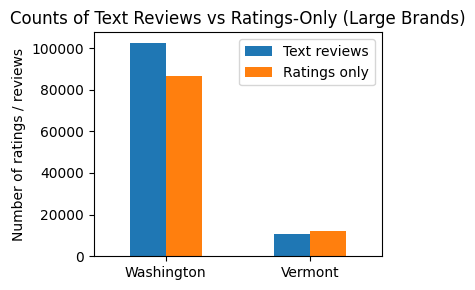

In [10]:
# PLOT OF PROPORTION OF WASHINGTON REVIEWS VS VERMONT (REVIEWS VS RATINGS ONLY)
def review_counts(reviews_df):
    return {
        'Text reviews': reviews_df['text'].notna().sum(),
        'Ratings only': reviews_df['text'].isna().sum()
    }

wa_counts = review_counts(washington_large_brand_reviews)
vt_counts = review_counts(vermont_large_brand_reviews)

plot_df = pd.DataFrame(
    [wa_counts, vt_counts],
    index=['Washington', 'Vermont']
)

plot_df.plot(
    kind='bar',
    figsize=(4, 3)
)

plt.ylabel('Number of ratings / reviews')
plt.title('Counts of Text Reviews vs Ratings-Only (Large Brands)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
list_of_vermont_reviews_words = []
for review in vermont_large_brand_reviews.get('text').dropna():
    words = review.split()
    list_of_vermont_reviews_words.extend(words)
list_of_vermont_reviews_words
list_of_vermont_reviews_words = [item.lower().strip(')').strip('(') for item in list_of_vermont_reviews_words] # Strip some more useless stuff later
vermont_words_df = pd.DataFrame(list_of_vermont_reviews_words, columns = ['words'])
vermont_words_df = vermont_words_df.assign(counts = vermont_words_df.get('words'))
vermont_words_df


,words,counts
0,this,this
1,is,is
2,the,the
3,nicest,nicest
4,dollar,dollar
...,...,...
163516,by,by
163517,google,google
163518,cheap,cheap
163519,original,original


In [12]:
vermont_words_df = vermont_words_df.groupby(by='words').count().sort_values(by='counts', ascending=False)
vermont_words_df

,counts
words,
the,6358
and,5569
a,3898
to,3770
i,3096
...,...
😅😂,1
😃😃😃😃😃,1
😂😭,1


In [13]:
# VERMONT AND WASHINGTON REVIEWS DATASETS (NO NaN)
vermont_large_brand_reviews = vermont_large_brand_reviews[vermont_large_brand_reviews.get('text').notna()]
washington_large_brand_reviews = washington_large_brand_reviews[washington_large_brand_reviews.get('text').notna()]
vermont_large_brand_reviews

,user_id,name,time,rating,text,pics,resp,gmap_id
288,108758476807946989876,mooney576,1618685555898,5,This is the nicest Dollar General I have ever ...,None,None,0x4cb557211ca274a7:0xea1066df24155f3f
289,107910713451324158864,Ramona Boswell,1618720230434,5,Found my spin mop for a very reasonable price ...,None,None,0x4cb557211ca274a7:0xea1066df24155f3f
290,104194948209630774333,Margaret Korda,1618089231515,5,"Children activity books, toys, almond milk, wo...",None,None,0x4cb557211ca274a7:0xea1066df24155f3f
291,115609550906928329447,Nickie Farone,1606002449608,5,My first time to this new Dollar General in Sh...,None,None,0x4cb557211ca274a7:0xea1066df24155f3f
292,116807005411196146915,Chris Morris,1614431327231,5,"This place is new, nicely stocked, great custo...",None,None,0x4cb557211ca274a7:0xea1066df24155f3f
...,...,...,...,...,...,...,...,...
324467,106781489838055963299,jade shanahan,1487758136211,1,It's one of the filthiest places I've ever been.,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0
324468,101345679541877039790,Victor Nikulin,1486989570596,4,"good store, good location",None,None,0x4cc98bab87970361:0x39b72c846d9c2de0
324469,113757663893762234170,Tara Blodgett,1499312266764,5,Great store love it,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0
324470,113538754158444251861,Xtrmdream,1551286839497,4,(Translated by Google) A1\n\n(Original)\nA1,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0


In [14]:
#FUNCTIONS TAKING IN A SENTENCE AND RETURNING SENTIMENT SCORE (POS, NEG, NEUTRAL, OVERALL), takes too long to run though
def positive_sentiment_score(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['pos']

def negative_sentiment_score(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['neg']

def neutral_sentiment_score(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['neu']

def overall_sentiment_score(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

In [15]:
sid_obj = SentimentIntensityAnalyzer()
def vader_scores(sentence):
    return sid_obj.polarity_scores(sentence)

In [16]:
vermont_scores_ = vermont_large_brand_reviews['text'].apply(vader_scores)
vermont_scores = vermont_scores_.apply(pd.Series)
vermont_large_brand_reviews = vermont_large_brand_reviews.join(vermont_scores)
vermont_large_brand_reviews

,user_id,name,time,rating,text,pics,resp,gmap_id,neg,neu,pos,compound
288,108758476807946989876,mooney576,1618685555898,5,This is the nicest Dollar General I have ever ...,None,None,0x4cb557211ca274a7:0xea1066df24155f3f,0.0,0.665,0.335,0.9200
289,107910713451324158864,Ramona Boswell,1618720230434,5,Found my spin mop for a very reasonable price ...,None,None,0x4cb557211ca274a7:0xea1066df24155f3f,0.0,0.853,0.147,0.5859
290,104194948209630774333,Margaret Korda,1618089231515,5,"Children activity books, toys, almond milk, wo...",None,None,0x4cb557211ca274a7:0xea1066df24155f3f,0.0,0.736,0.264,0.7269
291,115609550906928329447,Nickie Farone,1606002449608,5,My first time to this new Dollar General in Sh...,None,None,0x4cb557211ca274a7:0xea1066df24155f3f,0.0,0.786,0.214,0.9685
292,116807005411196146915,Chris Morris,1614431327231,5,"This place is new, nicely stocked, great custo...",None,None,0x4cb557211ca274a7:0xea1066df24155f3f,0.0,0.490,0.510,0.8070
...,...,...,...,...,...,...,...,...,...,...,...,...
324467,106781489838055963299,jade shanahan,1487758136211,1,It's one of the filthiest places I've ever been.,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0,0.0,1.000,0.000,0.0000
324468,101345679541877039790,Victor Nikulin,1486989570596,4,"good store, good location",None,None,0x4cc98bab87970361:0x39b72c846d9c2de0,0.0,0.256,0.744,0.7003
324469,113757663893762234170,Tara Blodgett,1499312266764,5,Great store love it,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0,0.0,0.194,0.806,0.8519
324470,113538754158444251861,Xtrmdream,1551286839497,4,(Translated by Google) A1\n\n(Original)\nA1,None,None,0x4cc98bab87970361:0x39b72c846d9c2de0,0.0,0.685,0.315,0.3182


In [17]:
washington_scores_ = washington_large_brand_reviews['text'].apply(vader_scores)
washington_scores = washington_scores_.apply(pd.Series)
washington_large_brand_reviews = washington_large_brand_reviews.join(washington_scores)
washington_large_brand_reviews

,user_id,name,time,rating,text,pics,resp,gmap_id,neg,neu,pos,compound
179,105962529295221230004,Elma Aguilar,1621262381724,5,I am always greeted with a hello and the guys ...,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9,0.000,0.664,0.336,0.8439
180,113715462151102880246,Chris H.,1610391119195,5,Great gas station.,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9,0.000,0.328,0.672,0.6249
181,116614099645903094567,Dennis G.C,1596002100826,1,Be careful! They will short change you!!,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9,0.000,0.708,0.292,0.3561
182,111991567777534594168,Vision Painter,1578334070830,2,I don't like looking at graffiti while at the ...,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9,0.093,0.789,0.118,0.1506
183,108985485219972754141,Lester D,1560371530174,4,It's convenient,None,None,0x5490fc48a23c4bc3:0x9450327fb8d331f9,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
998442,116183543895997057085,howard stevens,1496760704576,1,Worst Post office I have ever been to..have co...,None,None,0x549aaa9bf8e2a0c7:0x6e0998201546ef6,0.286,0.714,0.000,-0.7783
998443,116531326283944273670,Ben Hernandez,1485728490662,2,Wait times are crazy.,None,None,0x549aaa9bf8e2a0c7:0x6e0998201546ef6,0.444,0.556,0.000,-0.3400
998444,102902211699994090746,Timothy Stafford,1467151536607,1,Post office at its worst. Nobody cares that t...,None,None,0x549aaa9bf8e2a0c7:0x6e0998201546ef6,0.204,0.647,0.149,-0.2732
998445,107989645880199047774,Maria Figueroa,1426723158992,1,Customer service is horrible,None,None,0x549aaa9bf8e2a0c7:0x6e0998201546ef6,0.538,0.462,0.000,-0.5423


In [18]:
washington_compound_overall = washington_large_brand_reviews.get('compound').mean()
washington_compound_overall
washington_neutral_overall = washington_large_brand_reviews.get('neu').mean()
washington_neutral_overall
washington_positive_overall = washington_large_brand_reviews.get('pos').mean()
washington_positive_overall
washington_negative_overall = washington_large_brand_reviews.get('neg').mean()
washington_negative_overall
washington_all_scores = [washington_compound_overall, washington_neutral_overall, washington_negative_overall, washington_positive_overall]
washington_all_scores

[np.float64(0.3863107190627288),
 np.float64(0.647663099829143),
 np.float64(0.04722823529411765),
 np.float64(0.30510852819135953)]

In [19]:
vermont_compound_overall = vermont_large_brand_reviews.get('compound').mean()
vermont_compound_overall
vermont_neutral_overall = vermont_large_brand_reviews.get('neu').mean()
vermont_neutral_overall
vermont_positive_overall = vermont_large_brand_reviews.get('pos').mean()
vermont_positive_overall
vermont_negative_overall = vermont_large_brand_reviews.get('neg').mean()
vermont_negative_overall
vermont_all_scores = [vermont_compound_overall, vermont_neutral_overall, vermont_negative_overall, vermont_positive_overall]
vermont_all_scores

[np.float64(0.3234042162063289),
 np.float64(0.6529706420340222),
 np.float64(0.05093506493506493),
 np.float64(0.2960916407536126)]

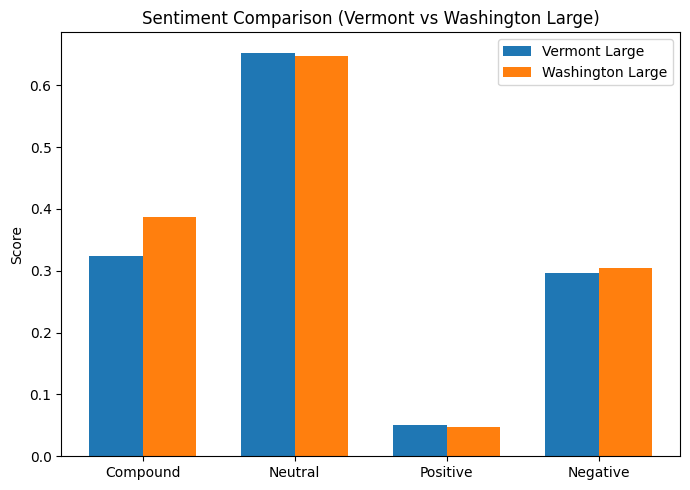

In [20]:
#PLOT VERMONT VS WASH LARGE
labels = ['Compound', 'Neutral', 'Positive', 'Negative']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, vermont_all_scores, width, label='Vermont Large')
plt.bar(x + width/2, washington_all_scores, width, label='Washington Large')

plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Sentiment Comparison (Vermont vs Washington Large)')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
vermont_small_brand_reviews = vermont_reviews[~vermont_reviews.get('gmap_id').isin(vermont_large_brands_ids)]
vermont_small_brand_reviews = vermont_small_brand_reviews[vermont_small_brand_reviews.get('text').notna()]
vermont_scores_small_ = vermont_small_brand_reviews['text'].apply(vader_scores)
vermont_scores_small = vermont_scores_small_.apply(pd.Series)
vermont_small_brand_reviews = vermont_small_brand_reviews.join(vermont_scores_small)
vermont_small_brand_reviews

,user_id,name,time,rating,text,pics,resp,gmap_id,neg,neu,pos,compound
0,118026874392842649478,rebecca kerns,1620085852324,5,Always done right from wood stove to screens!,None,"{'time': 1620087641504, 'text': 'Good Evening,...",0x89e02445cb9db457:0x37f42bff4edf7a43,0.000,1.000,0.000,0.0000
1,101532740754036204131,Peter DeForge,1580309946474,5,A great company to work with. Their sales and...,None,"{'time': 1580320228721, 'text': 'Good Afternoo...",0x89e02445cb9db457:0x37f42bff4edf7a43,0.045,0.745,0.210,0.8292
2,115404122636203550540,Chad Goulette,1605195974445,5,Great place to do business with staff was grea...,None,"{'time': 1605195166792, 'text': 'Hi Chad! Tha...",0x89e02445cb9db457:0x37f42bff4edf7a43,0.000,0.672,0.328,0.6588
3,104789336434407408181,Mark LaFountain,1593005848256,5,"Awesome Customer service, quick response, and ...",None,"{'time': 1593376422014, 'text': 'Mark, thank y...",0x89e02445cb9db457:0x37f42bff4edf7a43,0.000,0.676,0.324,0.8617
4,108980665975608069965,Jeff R,1582059996120,5,"If you need a top quality job, by a group of p...",None,"{'time': 1582063833737, 'text': 'Good Afternoo...",0x89e02445cb9db457:0x37f42bff4edf7a43,0.000,0.909,0.091,0.2714
...,...,...,...,...,...,...,...,...,...,...,...,...
324682,102505275044343796670,John Holzinger,1505493306672,5,Great apple picking,None,"{'time': 1505512091753, 'text': 'Thank you for...",0x89e1c79c60aef325:0xbed8bfc41018f020,0.000,0.328,0.672,0.6249
324683,100113091088132764964,Martha Dole-Rietta,1521463010002,5,This place is the best,None,"{'time': 1521511288277, 'text': 'Thank you Mar...",0x89e1c79c60aef325:0xbed8bfc41018f020,0.000,0.488,0.512,0.6369
324684,116781893093096618652,laura jenkins,1499856864077,5,Best!!,None,"{'time': 1500333036936, 'text': 'Thank you for...",0x89e1c79c60aef325:0xbed8bfc41018f020,0.000,0.000,1.000,0.6988
324685,110590523766834231540,Chantel Dyer,1499524449755,4,Lots of ppl,None,"{'time': 1500333126493, 'text': 'Thank you!'}",0x89e1c79c60aef325:0xbed8bfc41018f020,0.000,1.000,0.000,0.0000


In [22]:
vermont_compound_overall_small = vermont_small_brand_reviews.get('compound').mean()
vermont_compound_overall_small
vermont_neutral_overall_small = vermont_small_brand_reviews.get('neu').mean()
vermont_neutral_overall_small
vermont_positive_overall_small = vermont_small_brand_reviews.get('pos').mean()
vermont_positive_overall_small
vermont_negative_overall_small = vermont_small_brand_reviews.get('neg').mean()
vermont_negative_overall_small
vermont_all_scores_small = [vermont_compound_overall_small, vermont_neutral_overall_small, vermont_negative_overall_small, vermont_positive_overall_small]
vermont_all_scores_small

[np.float64(0.5633950877213963),
 np.float64(0.6037804752622075),
 np.float64(0.027823468911824148),
 np.float64(0.36839680926127466)]

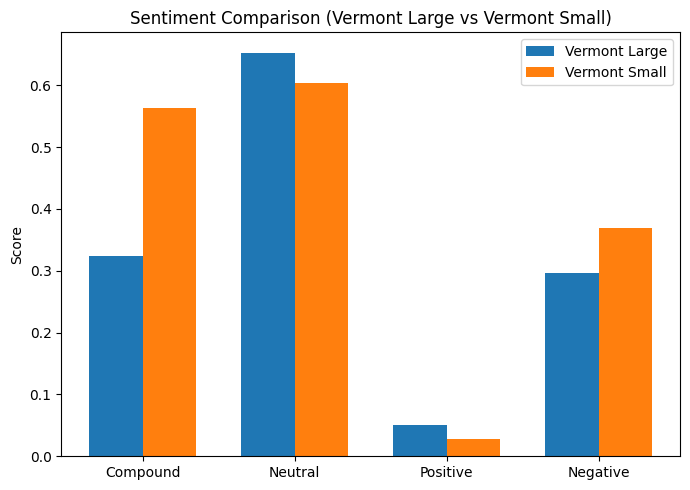

In [23]:
#PLOT 
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, vermont_all_scores, width, label='Vermont Large')
plt.bar(x + width/2, vermont_all_scores_small, width, label='Vermont Small')

plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Sentiment Comparison (Vermont Large vs Vermont Small)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#This cell takes forever to run (5+ minutes)
washington_small_brand_reviews = washington_reviews[~washington_reviews.get('gmap_id').isin(washington_large_brands_ids)]
washington_small_brand_reviews
washington_small_brand_reviews = washington_small_brand_reviews[washington_small_brand_reviews.get('text').notna()]
washington_scores_small_ = washington_small_brand_reviews['text'].apply(vader_scores)
washington_scores_small_


0         {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...
1         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2         {'neg': 0.033, 'neu': 0.775, 'pos': 0.191, 'co...
3         {'neg': 0.0, 'neu': 0.138, 'pos': 0.862, 'comp...
4         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                                ...                        
999995    {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...
999996    {'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...
999997    {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...
999998    {'neg': 0.145, 'neu': 0.777, 'pos': 0.078, 'co...
999999    {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...
Name: text, Length: 492778, dtype: object

In [28]:
washington_scores_small = washington_scores_small_.apply(pd.Series)
washington_small_brand_reviews = washington_small_brand_reviews.join(washington_scores_small)
washington_small_brand_reviews

,user_id,name,time,rating,text,pics,resp,gmap_id,neg,neu,pos,compound
0,103093043835388050629,Casper Steele,1626907411534,2,Drivers say security has bathroom key. Securit...,None,None,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,0.000,0.817,0.183,0.7650
1,111014066796803341223,Judy Maes,1613028426989,5,It's a CTRAN transit center with schedules to ...,None,None,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,0.000,1.000,0.000,0.0000
2,111724423355988809570,Daniel Hernandez,1536710665852,5,Neat little Transit Center with lots of schedu...,None,None,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,0.033,0.775,0.191,0.8858
3,115331094085411087904,Lumi Nosa,1484359806540,5,Very helpful. Thanks,None,None,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,0.000,0.138,0.862,0.7408
4,106906383883851362879,James Conright,1500643741079,1,They don't sell tacos.,None,None,0x5495ae7d3bf7d097:0xbcbc06152a3ccebc,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,112810786477463085299,Tyler Hupp,1485321226889,5,Best place in town to take a vehicle to. With ...,None,None,0x549bcb42c39d3cef:0xdd6d87e72c05f15c,0.000,0.707,0.293,0.7933
999996,101068021641145052110,Allen Antwine,1567902235611,5,Awesome automotive repair business!,None,"{'time': 1571698837167, 'text': 'Thank you for...",0x549bcb42c39d3cef:0xdd6d87e72c05f15c,0.000,0.406,0.594,0.6588
999997,110844749699007676859,Jimmy Capps,1549646382391,5,Good people fast service do it right the first...,None,"{'time': 1539102772023, 'text': 'Thanks Jimmy ...",0x549bcb42c39d3cef:0xdd6d87e72c05f15c,0.000,0.756,0.244,0.4404
999998,117063249666924483855,Dan Brown,1300912851455,5,Excellent service! My truck suffered severe d...,None,None,0x549bcb42c39d3cef:0xdd6d87e72c05f15c,0.145,0.777,0.078,-0.8776


In [29]:
washington_compound_overall_small = washington_small_brand_reviews.get('compound').mean()
washington_compound_overall_small
washington_neutral_overall_small = washington_small_brand_reviews.get('neu').mean()
washington_neutral_overall_small
washington_positive_overall_small = washington_small_brand_reviews.get('pos').mean()
washington_positive_overall_small
washington_negative_overall_small = washington_small_brand_reviews.get('neg').mean()
washington_negative_overall_small
washington_all_scores_small = [washington_compound_overall_small, washington_neutral_overall_small, washington_negative_overall_small, washington_positive_overall_small]
washington_all_scores_small

[np.float64(0.5708997365953836),
 np.float64(0.6189652886289563),
 np.float64(0.0305419235436647),
 np.float64(0.35049363810884426)]

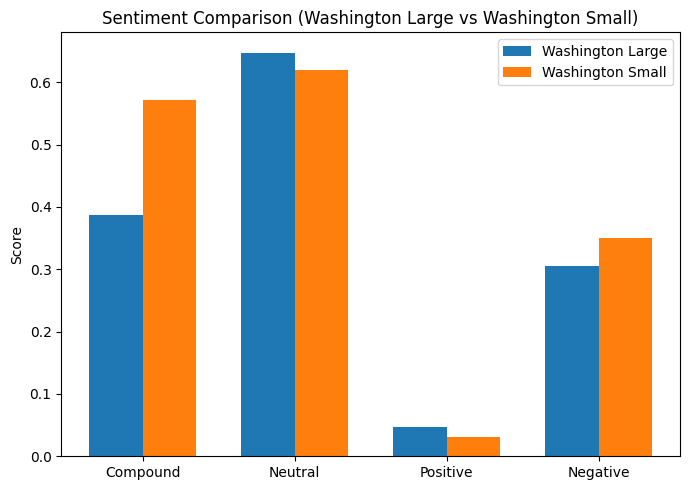

In [30]:
#PLOT 
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, washington_all_scores, width, label='Washington Large')
plt.bar(x + width/2, washington_all_scores_small, width, label='Washington Small')

plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Sentiment Comparison (Washington Large vs Washington Small)')
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
vermont_independent_brands_list = vermont_locations_classification[vermont_locations_classification.get('brand_size') == 'singular'].index
vermont_independent_brands_list

vermont_independent_brands_ids = vermont_meta[vermont_meta.get('name').isin(vermont_independent_brands_list)].set_index('gmap_id').index
vermont_independent_brands_ids

vermont_independent_brand_reviews = vermont_reviews[vermont_reviews.get('gmap_id').isin(vermont_independent_brands_ids)]
vermont_independent_brand_reviews
#vermont_locations_classification
#vermont_large_brands_ids

,user_id,name,time,rating,text,pics,resp,gmap_id
278,109498429739980436624,Tammie Knowles,1617747721717,5,Dude I can't wait for my appointment here. Bet...,None,None,0x4cca77b7b019765d:0x678d980210cbbb32
279,108824692037925817823,Treman Fuller,1603597334058,5,Awesome place to get tattooed. Chris the owner...,None,None,0x4cca77b7b019765d:0x678d980210cbbb32
280,110808412040781668453,Blake Stophenberg,1555377028889,5,"Great shop with a real nice vibe, and open lay...",None,None,0x4cca77b7b019765d:0x678d980210cbbb32
281,107283965317587560132,William Nesbitt,1570033315901,5,Very professional!! Keep up the awesome job Ch...,None,None,0x4cca77b7b019765d:0x678d980210cbbb32
282,103863211025091948179,Rebecca Tourville,1556468675012,5,Chris is an amazing artist!,None,None,0x4cca77b7b019765d:0x678d980210cbbb32
...,...,...,...,...,...,...,...,...
324720,102604405041956328019,Nicole Couture,1534560336677,5,NaN,None,"{'time': 1535421423802, 'text': 'Thank you for...",0x89e1c79c60aef325:0xbed8bfc41018f020
324721,113667429629445112279,Holly Chase,1601130739739,5,NaN,None,"{'time': 1601394881137, 'text': 'Holly, Thank ...",0x89e1c79c60aef325:0xbed8bfc41018f020
324722,101031262113246567699,Jennie Drummind,1503368927511,5,NaN,None,"{'time': 1503963258239, 'text': 'Jennie! Thank...",0x89e1c79c60aef325:0xbed8bfc41018f020
324723,113511800890575185422,John Hawkins,1566750149101,5,NaN,None,"{'time': 1566954272879, 'text': 'John, Thank y...",0x89e1c79c60aef325:0xbed8bfc41018f020


In [34]:
vermont_scores_independent_ = vermont_independent_brand_reviews['text'].dropna().apply(vader_scores)
vermont_scores_independent = vermont_scores_independent_.apply(pd.Series)
vermont_independent_brand_reviews = vermont_independent_brand_reviews.join(vermont_scores_independent)
vermont_independent_brand_reviews

,user_id,name,time,rating,text,pics,resp,gmap_id,neg,neu,pos,compound
278,109498429739980436624,Tammie Knowles,1617747721717,5,Dude I can't wait for my appointment here. Bet...,None,None,0x4cca77b7b019765d:0x678d980210cbbb32,0.0,0.786,0.214,0.9356
279,108824692037925817823,Treman Fuller,1603597334058,5,Awesome place to get tattooed. Chris the owner...,None,None,0x4cca77b7b019765d:0x678d980210cbbb32,0.0,0.777,0.223,0.8093
280,110808412040781668453,Blake Stophenberg,1555377028889,5,"Great shop with a real nice vibe, and open lay...",None,None,0x4cca77b7b019765d:0x678d980210cbbb32,0.0,0.667,0.333,0.9584
281,107283965317587560132,William Nesbitt,1570033315901,5,Very professional!! Keep up the awesome job Ch...,None,None,0x4cca77b7b019765d:0x678d980210cbbb32,0.0,0.571,0.429,0.7405
282,103863211025091948179,Rebecca Tourville,1556468675012,5,Chris is an amazing artist!,None,None,0x4cca77b7b019765d:0x678d980210cbbb32,0.0,0.494,0.506,0.6239
...,...,...,...,...,...,...,...,...,...,...,...,...
324720,102604405041956328019,Nicole Couture,1534560336677,5,NaN,None,"{'time': 1535421423802, 'text': 'Thank you for...",0x89e1c79c60aef325:0xbed8bfc41018f020,NaN,NaN,NaN,NaN
324721,113667429629445112279,Holly Chase,1601130739739,5,NaN,None,"{'time': 1601394881137, 'text': 'Holly, Thank ...",0x89e1c79c60aef325:0xbed8bfc41018f020,NaN,NaN,NaN,NaN
324722,101031262113246567699,Jennie Drummind,1503368927511,5,NaN,None,"{'time': 1503963258239, 'text': 'Jennie! Thank...",0x89e1c79c60aef325:0xbed8bfc41018f020,NaN,NaN,NaN,NaN
324723,113511800890575185422,John Hawkins,1566750149101,5,NaN,None,"{'time': 1566954272879, 'text': 'John, Thank y...",0x89e1c79c60aef325:0xbed8bfc41018f020,NaN,NaN,NaN,NaN


In [35]:
vermont_compound_overall_independent = vermont_independent_brand_reviews.get('compound').mean()
vermont_compound_overall_independent
vermont_neutral_overall_independent = vermont_independent_brand_reviews.get('neu').mean()
vermont_neutral_overall_independent
vermont_positive_overall_independent = vermont_independent_brand_reviews.get('pos').mean()
vermont_positive_overall_independent
vermont_negative_overall_independent = vermont_independent_brand_reviews.get('neg').mean()
vermont_negative_overall_independent
vermont_all_scores_independent = [vermont_compound_overall_independent, vermont_neutral_overall_independent, vermont_negative_overall_independent, vermont_positive_overall_independent]
vermont_all_scores_independent

[np.float64(0.5960763386801344),
 np.float64(0.5960412850716185),
 np.float64(0.02465120360506732),
 np.float64(0.37930869155368896)]

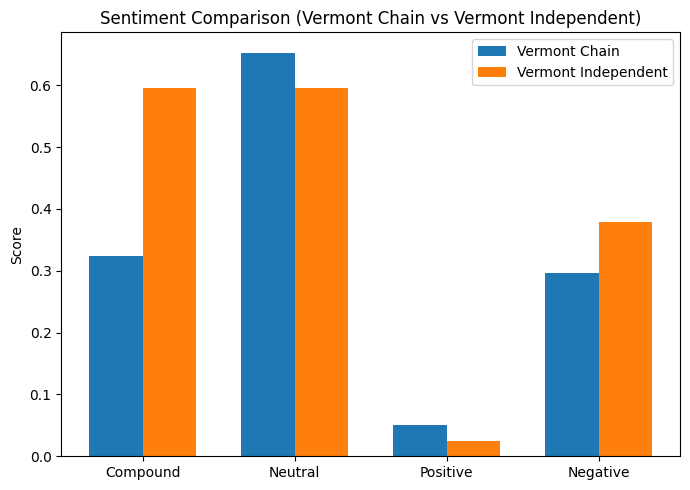

In [36]:
#PLOT 
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7, 5))
plt.bar(x - width/2, vermont_all_scores, width, label='Vermont Chain')
plt.bar(x + width/2, vermont_all_scores_independent, width, label='Vermont Independent')

plt.xticks(x, labels)
plt.ylabel('Score')
plt.title('Sentiment Comparison (Vermont Chain vs Vermont Independent)')
plt.legend()
plt.tight_layout()
plt.show()
